[Python Project] Sentiment Analysis and Visualization of Stock News - YouTube 
https://www.youtube.com/watch?v=o-zM8onpQZY

Rev 1 incorporates simple statistics and sorting based on nltk sentiment ratings. si

Rev 2 incorporates stopwords removal and then plots word clouds based on sentiment ratings.; adds pie chart; search titles
using key word. si

kernel: Python [conda env:PYTHON_SERVICES]

In [7]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

# nltk.download('punkt')
nltk.download('stopwords')
stopWords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\phiro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


What is the symbol of the stock? (Please enter only one.)intc
['intc']


<Figure size 720x576 with 0 Axes>

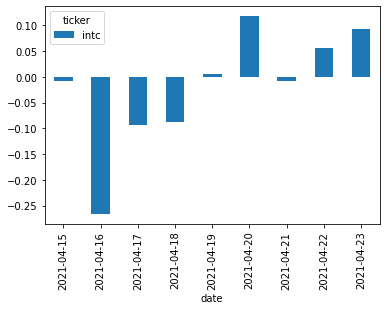

Date Range of the 100 most recent articles: 
Most Recent Article Date:  2021-04-23
Oldest Article Date:  2021-04-15 

['intc']
The percent of articles with Positive, Neutral and Negative sentiment.


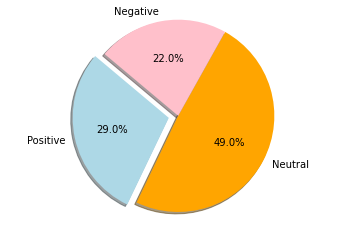

*****************
POSITIVE SENTIMENT: 
The number of positive sentiment numbers is:  29
The percent of postive sentiment numbers is:  28.999999999999996 % 



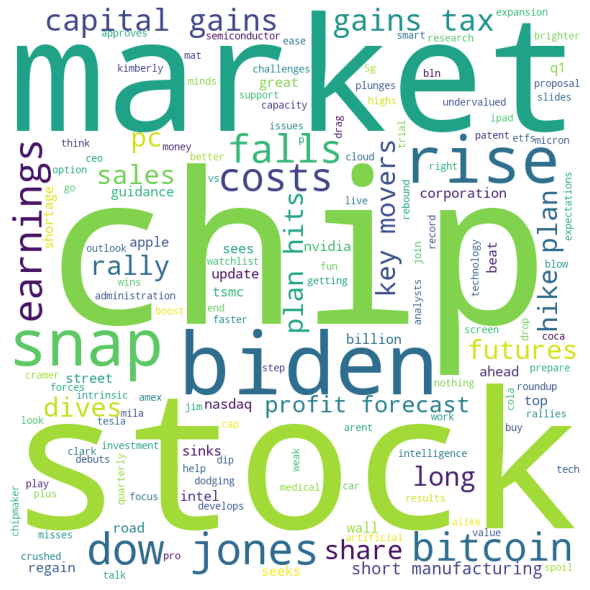

What key word do you want to search on to find the positive sentiment title? (Hit enter if none) 
Biden
2021-04-23 Biden administration's $50 billion to help end chip shortage 'is a great first step': Intel CEO
2021-04-23 Dow Jones Futures: Bitcoin Dives To $50,000; Intel, Snap Key Movers After Biden Capital Gains Tax Hike Plan Hits Market Rally
2021-04-23 LIVE: Jim Cramer on Biden's Capital Gains Proposal, Intel
2021-04-23 Dow Jones Futures: Bitcoin Dives Below $50,000, Intel, Snap Key Movers After Biden Capital Gains Tax Hike Plan Hits Market Rally
2021-04-22 Dow Jones Futures: Bitcoin Plunges Below $50,000, Intel, Snap Key Movers After Biden Capital Gains Tax Hike Plan Hits Market Rally
Do you want to search for another key word? (Enter either a "y" or "n") 

*****************
NEUTRAL SENTIMENT:
The number of neutral sentiment numbers is:  49
The percent of neutral sentiment numbers is:  49.0 % 



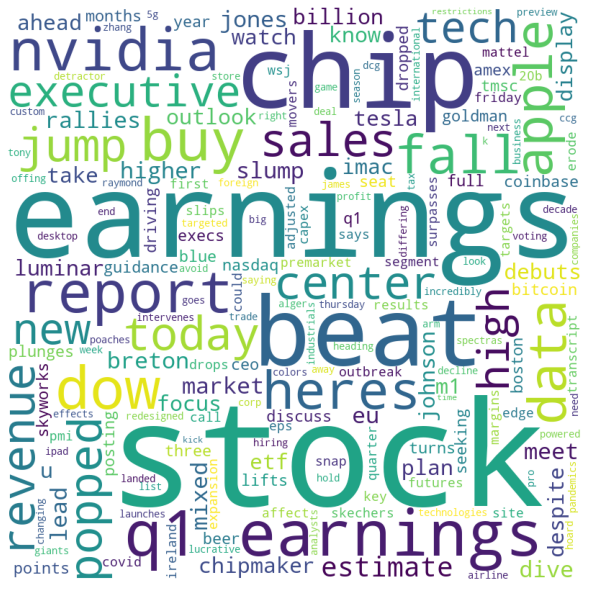

In [ ]:
# 10 finviz scraping

#### METHODS ####


def remove_stopwords(): #provides a comprehensive list of stopwords; returns 'stopWords'

    #440
    from nltk.tokenize import sent_tokenize, word_tokenize
    from nltk.corpus import stopwords

    #450
    #import nltk
    #nltk.download('punkt')
    #nltk.download('stopwords')
    stopWords = set(stopwords.words('english'))

    #print(len(stopWords))

    #470 creates a list of new stopwords and then adds them to the set provided by nltk
    # Note: it is case sensitive


    newStopWords = ['a', 'about', 'above', 'across', 'after', 'afterwards']
    newStopWords += ['again', 'against', 'all', 'almost', 'alone', 'along']
    newStopWords += ['already', 'also', 'although', 'always', 'am', 'among']
    newStopWords += ['amongst', 'amoungst', 'amount', 'an', 'and', 'another']
    newStopWords += ['any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere']
    newStopWords += ['are', 'around', 'as', 'at', 'back', 'be', 'became']
    newStopWords += ['because', 'become', 'becomes', 'becoming', 'been']
    newStopWords += ['before', 'beforehand', 'behind', 'being', 'below']
    newStopWords += ['beside', 'besides', 'between', 'beyond', 'bill', 'both']
    newStopWords += ['bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant']
    newStopWords += ['co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de']
    newStopWords += ['describe', 'detail', 'did', 'do', 'done', 'down', 'due']
    newStopWords += ['during', 'each', 'eg', 'eight', 'either', 'eleven', 'else']
    newStopWords += ['elsewhere', 'empty', 'enough', 'etc', 'even', 'ever']
    newStopWords += ['every', 'everyone', 'everything', 'everywhere', 'except']
    newStopWords += ['few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first']
    newStopWords += ['five', 'for', 'former', 'formerly', 'forty', 'found']
    newStopWords += ['four', 'from', 'front', 'full', 'further', 'get', 'give']
    newStopWords += ['go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her']
    newStopWords += ['here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers']
    newStopWords += ['herself', 'him', 'himself', 'his', 'how', 'however']
    newStopWords += ['hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed']
    newStopWords += ['interest', 'into', 'is', 'it', 'its', 'itself', 'keep']
    newStopWords += ['last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made']
    newStopWords += ['many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine']
    newStopWords += ['more', 'moreover', 'most', 'mostly', 'move', 'much']
    newStopWords += ['must', 'my', 'myself', 'name', 'namely', 'neither', 'never']
    newStopWords += ['nevertheless', 'next', 'nine', 'nobody', 'none'] #removed 'no'
    newStopWords += ['noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of']
    newStopWords += ['off', 'often', 'on','once', 'one', 'only', 'onto', 'or']
    newStopWords += ['other', 'others', 'otherwise', 'our', 'ours', 'ourselves']
    newStopWords += ['out', 'over', 'own', 'part', 'per', 'perhaps', 'please']
    newStopWords += ['put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed']
    newStopWords += ['seeming', 'seems', 'serious', 'several', 'she', 'should']
    newStopWords += ['show', 'side', 'since', 'sincere', 'six', 'sixty', 'so']
    newStopWords += ['some', 'somehow', 'someone', 'something', 'sometime']
    newStopWords += ['sometimes', 'somewhere', 'still', 'such', 'system', 'take']
    newStopWords += ['ten', 'than', 'that', 'the', 'their', 'them', 'themselves']
    newStopWords += ['then', 'thence', 'there', 'thereafter', 'thereby']
    newStopWords += ['therefore', 'therein', 'thereupon', 'these', 'they']
    newStopWords += ['thick', 'thin', 'third', 'this', 'those', 'though', 'three']
    newStopWords += ['three', 'through', 'throughout', 'thru', 'thus', 'to']
    newStopWords += ['together', 'too', 'top', 'toward', 'towards', 'twelve']
    newStopWords += ['twenty', 'two', 'un', 'under', 'until', 'up', 'upon']
    newStopWords += ['us', 'very', 'via', 'was', 'we', 'well', 'were', 'what']
    newStopWords += ['whatever', 'when', 'whence', 'whenever', 'where']
    newStopWords += ['whereafter', 'whereas', 'whereby', 'wherein', 'whereupon']
    newStopWords += ['wherever', 'whether', 'which', 'while', 'whither', 'who']
    newStopWords += ['whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with']
    newStopWords += ['within', 'without', 'would', 'yet', 'you', 'your']
    newStopWords += ['yours', 'yourself', 'yourselves'] #provided by Codecademy??

    # additional stopwords:
    newStopWords += ['[Screenshot]', '[screenshot]', 'Screenshot', '[Screenshot]Great', '[SCREENSHOT]', 'screenshot', 
                 'The', 'the', 'SMART', 'yah', 'got', 'nutty', 'moving', 'weeks', 'Got', 'So', 'today', 'Been', 'or',
                    "n't"]

    newStopWords += ['I', 'it', 'It'] # pronouns

    newStopWords += ['AMD', 'NVDA','NVDA', 'TSLA', 'GOOG', 'BA', 'FB', 'GOOGL', 'INTC', 'intel', 'Intel', 'CSCO', 'MU', 
                 'SMH', 'TSM','AAPL', 'TSLA', 'CSCO', 'POETF', 'PHOTONICS', 'DD', 'ARWR', 'T', 'INFI', 'AMC', 'ARK',
                'GME', 'NIO', 'QS', 'ADBE', 'MSFT'] # Stock symbols or names

    newStopWords += ['Readytogo123', 'Maddog68','Stocktwits'] # nouns

    newStopWords += ['.', '?', '!', ';', ',', "'"] # punctuation

    newStopWords += ['&', '#', '%', '$', '@'] # symbols

    newStopWords += ['41.75', '530.05', '39', 'Two', 'two',] # numbers

    #adds them to the stopWords list provided by nltk
    for i in newStopWords:
        stopWords.add(i) #stopWords is defined as a "set" in #450 when inputed as english words from nltk;
        # sets cannot be ordered so it must be converted back to a list to be ordered or alphabetized. A set has no duplicate elements.

    #print(len(stopWords))
    #print(stopWords)

    #converts the set to a list
    stopWords_list = list(stopWords)

    #sorts the stopword list
    stopWords_list.sort(key = lambda k : k.lower())
    #print(stopWords_list)
    
    
    #480 This removes words from the list of stopwords and writes list to csv file
    # https://stackoverflow.com/questions/29771168/how-to-remove-words-from-a-list-in-python#:~:text=one%20more%20easy%20way%20to%20remove%20words%20from,%3D%20words%20-%20stopwords%20final_list%20%3D%20list%20%28final_list%29
    #new_words = list(filter(lambda w: w not in stop_words, initial_words))

    WordsToBeRem = ['no'] #words to be removed from the stopword_list
    stopWords = list(filter(lambda w: w not in WordsToBeRem, stopWords_list)) #stopWords_list has been sorted in #470

    #converts the stopword list to a df and then outputs the df to a csv file
    df_stopwords = pd.DataFrame(stopWords, columns = ['stopwords'])
    df_stopwords.to_csv('stopwords.csv', index = False) #writes the csv file
    
    return stopWords

def remove(df, stopWords): #returns a df where the stopwords are removed

    dfScrubbed = df.copy() #This is a deep copy. df.copy(deep = True); deep = True is default

    i = 0
    
    while i < len(df):
    
        data = df.iloc[i,1] #column #1 holds the titles of the posts
        words = word_tokenize(data) #the title is separated into individual words (tokenized)
        wordsFiltered = []

        for w in words:
            if w not in stopWords:
                wordsFiltered.append(w)
    
        joinedWordsFiltered = ' '.join(wordsFiltered) #combines the individual words into one string
    
        dfScrubbed.iloc[i,1] = joinedWordsFiltered # replaces the recorded in dfAPIScrubbed with the stopWords removed
        #from the 'body'
    
        i += 1
    
    #print(wordsFiltered)

    #print(dfScrubbed.head())

    return(dfScrubbed)

def wc(df): #creates the word cloud
    #from wordcloud import WordCloud, STOPWORDS 
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt 
    import pandas as pd 

    stopwords = set(stopWords) 
    words = ''
    for review in df.title:
        tokens = str(review).split()
        tokens = [i.lower() for i in tokens]
    
        words += ' '.join(tokens) + ' '
    
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show() 

def kw(df,keyword): # searches a string for key words; if found will print out the date and title
    i = 0
    while i < len(df):
    
        data = df.iloc[i,1] #column #1 holds the titles of the posts
        a_bool = keyword in data

        if a_bool == True:
            print(df.iloc[i,0], df.iloc[i,1])
        
        i += 1


    
#### MAIN ####

symbol = input('What is the symbol of the stock? (Please enter only one.)')

finviz_url = 'https://www.finviz.com/quote.ashx?t='
#tickers = ['NVDA', 'SLV', 'MU']
tickers = [symbol]

news_tables = {}

for ticker in tickers:
    url = finviz_url + ticker
    
    req = Request(url = url, headers = {'user-agent': 'my-app'})
    response = urlopen(req)
    
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id = 'news-table')
    news_tables[ticker] = news_table
    
parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        
        title = row.a.get_text()
        date_data = row.td.text.split(' ')
        
        if len(date_data) == 1: # if there is both a date and time it parses them into two columns
            time = date_data[0]
        else: 
            date = date_data[0] 
            time = date_data[1]
        parsed_data.append([ticker, date, time, title])
        
df = pd.DataFrame(parsed_data, columns = ['ticker', 'date', 'time', 'title'])

vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)

#print(df.head()) # commented out by si
#print(len(df)) # commented out by si

df ['date'] = pd.to_datetime(df.date).dt.date        
        
plt.figure(figsize = (10 ,8))

mean_df = df.groupby(['ticker', 'date']).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound', axis = 'columns').transpose()

mean_df.plot(kind = 'bar')

print(tickers)
plt.show()


# provides date ranges for the last 100 articles; added by si
print('Date Range of the 100 most recent articles: ') #added by si
print('Most Recent Article Date: ', df.iloc[0,1]) #added by si
print('Oldest Article Date: ', df.iloc[99,1], '\n') #added by si

# provides basic sentiment statistics; added by si
i = 0 # set starting index number to 0
pos_counter = 0 # sets starting positive counter to 0
neu_counter = 0
neg_counter = 0

dfpos = pd.DataFrame(columns = ['date', 'title']) #initializes df where positive titles are stored
dfneu = pd.DataFrame(columns = ['date', 'title'])
dfneg = pd.DataFrame(columns = ['date', 'title'])


while i < len(df):
    if df.iloc[i,4] > 0.0:
        pos_counter += 1
        dfpos = dfpos.append(dict(zip(dfpos.columns,[df.iloc[i,1], df.iloc[i,3]])), ignore_index=True) #fill dfpos df

    elif df.iloc[i,4] == 0.0:
            neu_counter += 1
            dfneu = dfneu.append(dict(zip(dfneu.columns,[df.iloc[i,1], df.iloc[i,3]])), ignore_index=True)

    elif df.iloc[i,4] < 0.0:
            neg_counter += 1
            dfneg = dfneg.append(dict(zip(dfneg.columns,[df.iloc[i,1], df.iloc[i,3]])), ignore_index=True)
            
    i += 1

    
    
##### Pie Chart

# Data to plot
labels = 'Positive', 'Neutral', 'Negative'
sizes = [pos_counter, neu_counter, neg_counter]
colors = ['lightblue', 'orange', 'pink']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')

print(tickers)
print('The percent of articles with Positive, Neutral and Negative sentiment.')
plt.show()
    
#### produces the word clouds; added by si
print('*****************')
print('POSITIVE SENTIMENT: ')
print('The number of positive sentiment numbers is: ', pos_counter)
print('The percent of postive sentiment numbers is: ', pos_counter/len(df) * 100,'% \n')
wc(remove(dfpos,remove_stopwords()))

key_word = input('What key word do you want to search on to find the positive sentiment title? (Hit enter if none) \n')
if key_word:
    kw(dfpos, key_word)
    more = input('Do you want to search for another key word? (Enter either a "y" or "n") \n')
    if more == "y":
        key_word = input('What key word do you want to search on to find the positive sentiment title? \n')
        if key_word:
            kw(dfpos, key_word)
            more = input('Do you want to search for another key word? (Enter either a "y" or "no") \n')


print('*****************')
print('NEUTRAL SENTIMENT:')
print('The number of neutral sentiment numbers is: ', neu_counter)
print('The percent of neutral sentiment numbers is: ', neu_counter/len(df) * 100,'% \n')
wc(remove(dfneu,remove_stopwords()))

key_word = input('What key word do you want to search on to find the neutral sentiment title? (Hit enter if none) \n')
if key_word:
    kw(dfneu, key_word)
    more = input('Do you want to search for another key word? (Enter either a "y" or "n") \n')
    if more == "y":
        key_word = input('What key word do you want to search on to find the neutral sentiment title? \n')
        if key_word:
            kw(dfneu, key_word)
            more = input('Do you want to search for another key word? (Enter either a "y" or "no") \n')

print('*****************')
print('NEGATIVE SENTIMENT: ')
print('The number of negative sentiment numbers is: ', neg_counter)
print('The percent of negativetive sentiment numbers is: ', neg_counter/len(df) * 100,'% \n')
wc(remove(dfneg,remove_stopwords()))

key_word = input('What key word do you want to search on to find the negative sentiment title? (Hit enter if none) \n')
if key_word:
    kw(dfneg, key_word)
    more = input('Do you want to search for another key word? (Enter either a "y" or "n") \n')
    if more == "y":
        key_word = input('What key word do you want to search on to find the negative sentiment title? \n')
        if key_word:
            kw(dfneg, key_word)
            more = input('Do you want to search for another key word? (Enter either a "y" or "no") \n')




In [1]:
#pip install wordcloud